In [1]:
# Increasing jupyter notebook width sizes

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [39]:
# Import necessary python libraries

import pandas as pd
import numpy as np
# importing pandas profile
import pandas_profiling
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style = "ticks")
from pylab import rcParams
rcParams['figure.figsize'] = 15,10  # rcParams for plot rendering attributes
rcParams['font.size'] = 15
rcParams['axes.facecolor'] = 'white' # plott 
import matplotlib as mpl
mpl.rc('lines', linewidth=5, color='r')# Reference: https://matplotlib.org/api/matplotlib_configuration_api.html#matplotlib.rcParams

In [3]:
# Reading the file 
churn = pd.read_excel("churn.xlsx")

In [4]:
churn.shape

(4617, 22)

The dataset has 4617 observations with 22 variables.

In [5]:
churn.columns

Index(['Unnamed: 0', 'columns1', 'columns2', 'columns3', 'columns4',
       'columns5', 'columns6', 'columns7', 'columns8', 'columns9', 'columns10',
       'columns11', 'columns12', 'columns13', 'columns14', 'columns15',
       'columns16', 'columns17', 'columns18', 'columns19', 'columns20',
       'columns21'],
      dtype='object')

In [6]:
# Renaming the columns names as per the description
churn.rename(columns = {'columns1': 'State', 'columns2': 'Account_Length', 'columns3': 'Area_Code', 'columns4': 'Phone','columns5': 'International_plan',
                     'columns6': 'VMail_Plan', 'columns7': 'Vmail_Message', 'columns8' : 'Day_Mins',
                     'columns9':'Day_Calls','columns10':'Day_Charge','columns11' :'Eve_Mins','columns12':'Eve_Calls',
                     'columns13': 'Eve_Charge', 'columns14': 'Night_Mins','columns15':'Night_Calls',
                     'columns16': 'Night_Charge','columns17':'International_Mins','columns18':'International_Calls',
                     'columns19':'International_Charge','columns20': 'CustServ_Calls','columns21':'Churn'}, inplace = True)

In [7]:
churn.columns

Index(['Unnamed: 0', 'State', 'Account_Length', 'Area_Code', 'Phone',
       'International_plan', 'VMail_Plan', 'Vmail_Message', 'Day_Mins',
       'Day_Calls', 'Day_Charge', 'Eve_Mins', 'Eve_Calls', 'Eve_Charge',
       'Night_Mins', 'Night_Calls', 'Night_Charge', 'International_Mins',
       'International_Calls', 'International_Charge', 'CustServ_Calls',
       'Churn'],
      dtype='object')

In [8]:
churn.head()

,Unnamed: 0,State,Account_Length,Area_Code,Phone,International_plan,VMail_Plan,Vmail_Message,Day_Mins,Day_Calls,...,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_Calls,International_Charge,CustServ_Calls,Churn
0,0,KS,128,415,382-4657,no,yes,25,265.1,110,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,1,OH,107,415,371-7191,no,yes,26,161.6,123,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,2,NJ,137,415,358-1921,no,no,0,243.4,114,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,3,OH,84,408,375-9999,yes,no,0,299.4,71,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,4,OK,75,415,330-6626,yes,no,0,166.7,113,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [9]:
churn.dtypes

Unnamed: 0                int64
State                    object
Account_Length            int64
Area_Code                 int64
Phone                    object
International_plan       object
VMail_Plan               object
Vmail_Message             int64
Day_Mins                float64
Day_Calls                 int64
Day_Charge              float64
Eve_Mins                float64
Eve_Calls                 int64
Eve_Charge              float64
Night_Mins              float64
Night_Calls               int64
Night_Charge            float64
International_Mins      float64
International_Calls       int64
International_Charge    float64
CustServ_Calls            int64
Churn                    object
dtype: object

In [10]:
del churn['Unnamed: 0']

In [13]:
churn.columns

Index(['State', 'Account_Length', 'Area_Code', 'Phone', 'International_plan',
       'VMail_Plan', 'Vmail_Message', 'Day_Mins', 'Day_Calls', 'Day_Charge',
       'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins', 'Night_Calls',
       'Night_Charge', 'International_Mins', 'International_Calls',
       'International_Charge', 'CustServ_Calls', 'Churn'],
      dtype='object')

In [123]:
pandas_profiling.ProfileReport(churn)

Number of variables,22
Number of observations,4617
Total Missing (%),0.0%
Total size in memory,793.6 KiB
Average record size in memory,176.0 B
Numeric,13
Categorical,4
Boolean,0
Date,0
Text (Unique),1
Rejected,4


In [15]:
# Creating numeric column list

churn_numeric = churn[['Account_Length', 'Area_Code', 'Vmail_Message', 'Day_Mins', 'Day_Calls', 'Day_Charge', 'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins',
                'Night_Calls', 'Night_Charge', 'International_Mins', 'International_Calls', 'International_Charge', 'CustServ_Calls']]

In [16]:
churn_numeric.head()

,Account_Length,Area_Code,Vmail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_Calls,International_Charge,CustServ_Calls
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


# Checking the Normality

In [ ]:
#checking the distribution of variables-normal distrubition(-1.96 to +1.96)

In [19]:
for i in churn_numeric:
    print('skewness and Kurtosis for '+ str(i)+': '+str(stats.skew(churn_numeric[i]))+' and '+ str(stats.kurtosis(churn_numeric[i])))

skewness and Kurtosis for Account_Length: 0.10621316744599318 and -0.0937513108437864
skewness and Kurtosis for Area_Code: 1.134964594925911 and -0.6865952826512816
skewness and Kurtosis for Vmail_Message: 1.3263030509972922 and 0.12209308548663644
skewness and Kurtosis for Day_Mins: -0.002947284016695239 and -0.04365222612737929
skewness and Kurtosis for Day_Calls: -0.08098712687907403 and 0.19463514964618556
skewness and Kurtosis for Day_Charge: -0.0029508087758798626 and -0.04351742102672107
skewness and Kurtosis for Eve_Mins: -0.0052781500846280525 and 0.042283656150823745
skewness and Kurtosis for Eve_Calls: -0.01754836130740179 and 0.13453389767071755
skewness and Kurtosis for Eve_Charge: -0.005250110884106289 and 0.042175304917122514
skewness and Kurtosis for Night_Mins: 0.02050841390755843 and 0.06004343141054003
skewness and Kurtosis for Night_Calls: 0.03087626932619969 and 0.06744148412465867
skewness and Kurtosis for Night_Charge: 0.020500316821170136 and 0.06001463464630463

International Calls is not normally distributed as it's kurtosis is above 1.96 cut off

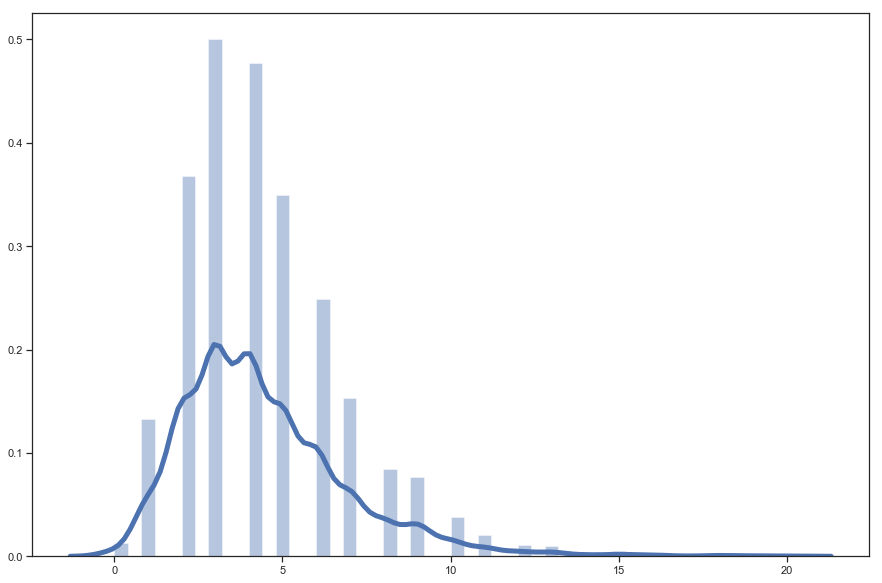

In [41]:
sns.distplot([churn_numeric['International_Calls']])

International Calls is not normally distributed


In [50]:
# Checking the correlations between the variables.

corr = churn_numeric.corr()

In [53]:
corr

,Account_Length,Area_Code,Vmail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_Calls,International_Charge,CustServ_Calls
Account_Length,1.000000,-0.020394,-0.012983,0.002002,0.032783,0.001999,-0.006778,0.015598,-0.006775,-0.002077,-0.009482,-0.002095,0.003483,0.023485,0.003501,0.002620
Area_Code,-0.020394,1.000000,-0.002597,-0.018900,-0.013179,-0.018903,0.011513,-0.011528,0.011533,0.002794,0.015316,0.002782,-0.007292,-0.011531,-0.007386,0.021046
Vmail_Message,-0.012983,-0.002597,1.000000,0.009028,-0.003846,0.009025,0.017872,-0.006508,0.017878,0.004672,0.000889,0.004665,0.005167,0.007423,0.005202,-0.006951
Day_Mins,0.002002,-0.018900,0.009028,1.000000,-0.002823,1.000000,-0.010260,0.012990,-0.010268,0.009604,0.005165,0.009591,-0.012314,0.000166,-0.012261,-0.008149
Day_Calls,0.032783,-0.013179,-0.003846,-0.002823,1.000000,-0.002821,-0.006430,0.003923,-0.006429,0.010730,-0.013299,0.010724,0.012951,0.010889,0.013055,-0.008747
Day_Charge,0.001999,-0.018903,0.009025,1.000000,-0.002821,1.000000,-0.010255,0.012992,-0.010262,0.009606,0.005164,0.009593,-0.012315,0.000163,-0.012262,-0.008155
Eve_Mins,-0.006778,0.011513,0.017872,-0.010260,-0.006430,-0.010255,1.000000,0.001135,1.000000,-0.018830,0.014226,-0.018837,0.000165,0.005749,0.000172,-0.015598
Eve_Calls,0.015598,-0.011528,-0.006508,0.012990,0.003923,0.012992,0.001135,1.000000,0.001151,0.002610,-0.015463,0.002624,-0.002798,0.005198,-0.002831,0.007730
Eve_Charge,-0.006775,0.011533,0.017878,-0.010268,-0.006429,-0.010262,1.000000,0.001151,1.000000,-0.018839,0.014231,-0.018846,0.000163,0.005751,0.000170,-0.015611
Night_Mins,-0.002077,0.002794,0.004672,0.009604,0.010730,0.009606,-0.018830,0.002610,-0.018839,1.000000,0.025742,0.999999,-0.004549,-0.014651,-0.004500,-0.013871


In [52]:
corr.Account_Length.sort_values()

Area_Code              -0.020394
Vmail_Message          -0.012983
Night_Calls            -0.009482
Eve_Mins               -0.006778
Eve_Charge             -0.006775
Night_Charge           -0.002095
Night_Mins             -0.002077
Day_Charge              0.001999
Day_Mins                0.002002
CustServ_Calls          0.002620
International_Mins      0.003483
International_Charge    0.003501
Eve_Calls               0.015598
International_Calls     0.023485
Day_Calls               0.032783
Account_Length          1.000000
Name: Account_Length, dtype: float64

# Dropping variables

Dropping State, Area_Code, Phone as it is not going to help our target variable. Highly correlated variables Day_Charge, Eve_Charge, International_Charge and Night_Charge 

In [55]:
churn = churn.drop(['State', 'Area_Code', 'Phone', 'Day_Charge', 'Eve_Charge', 'International_Charge', 'Night_Charge'], axis = 1)

# Creating dummy variables

In [56]:
churn.head()

,Account_Length,International_plan,VMail_Plan,Vmail_Message,Day_Mins,Day_Calls,Eve_Mins,Eve_Calls,Night_Mins,Night_Calls,International_Mins,International_Calls,CustServ_Calls,Churn
0,128,no,yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False.
1,107,no,yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False.
2,137,no,no,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False.
3,84,yes,no,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False.
4,75,yes,no,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False.


In [57]:
churn.shape

(4617, 14)

In [58]:
# Creating Dummies for VMail Plan, International Plan and Churn
churn = pd.get_dummies(churn, columns = ['VMail_Plan', 'International_plan', 'Churn'], drop_first = True)

In [61]:
churn.head()

,Account_Length,Vmail_Message,Day_Mins,Day_Calls,Eve_Mins,Eve_Calls,Night_Mins,Night_Calls,International_Mins,International_Calls,CustServ_Calls,VMail_Plan_ yes,International_plan_ yes,Churn_ True.
0,128,25,265.1,110,197.4,99,244.7,91,10.0,3,1,1,0,0
1,107,26,161.6,123,195.5,103,254.4,103,13.7,3,1,1,0,0
2,137,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0,0,0
3,84,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0,1,0
4,75,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0,1,0


In [64]:
# Saving file 
churn.to_csv("Feature_Engg_before_scaling.csv", index = False)